## Bay Wheels [Ford GoBike] Bike Sharing System Usage During 2019

#### by Ibrahim Omar

Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California.<br>
Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018.

# Dataset Overview:
The dataset portion used for this analysis is 12 csv file for each month in 2019.<br>
For this analysis, the extracted data have been wrangled and cleaned to explore and visualise relationship between different columns of data.

In [3]:
from glob import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


%matplotlib inline
baseColor = sb.color_palette()[9]

In [4]:
def printTxt(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [12]:
files = glob('../Data/2019/*.csv')
data = [pd.read_csv(f, low_memory=False) for f in files]
df = pd.concat(data, ignore_index=True)

In [13]:
df.drop(columns=['start_station_latitude', 'start_station_longitude',
                 'end_station_latitude', 'end_station_longitude',
                 'start_station_name', 'end_station_name'], inplace=True)

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# column for start Date
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
# start hour
df['start_hourofday'] = df.start_time.dt.strftime('%H')
# start day of the week
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
# start month
df['start_month'] = df.start_time.dt.strftime('%B')
# start day of month
df['start_day'] = df.start_time.dt.strftime('%d')
# duration im min
df['duration_min'] = df.duration_sec / 60.

<span style='color:Black'>1. Number of riders on monthly basis throughout the year</span>

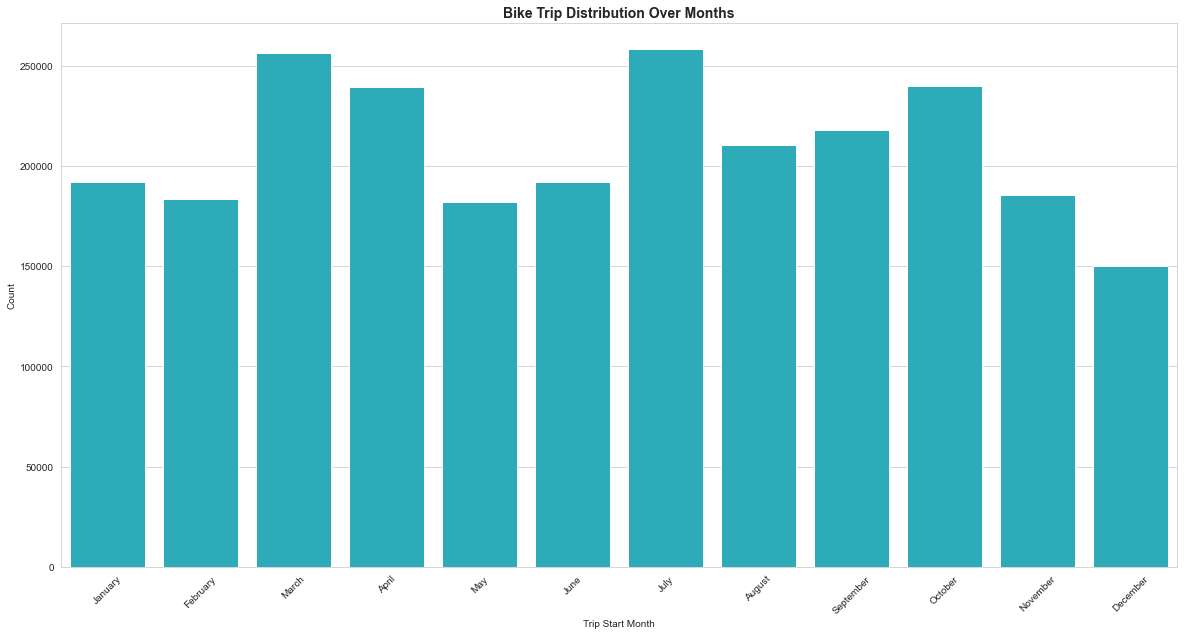

In [33]:
header = '1. Number of riders on monthly basis throughout the year'
printTxt(header, color='Black')

fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_month', color=baseColor);
plt.xticks(rotation=45);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');
plt.title('Bike trip distribution over months'.title(),fontsize = 14, weight = 'bold');

<span style='color:Black'>2. Number of riders according to day of the month</span>

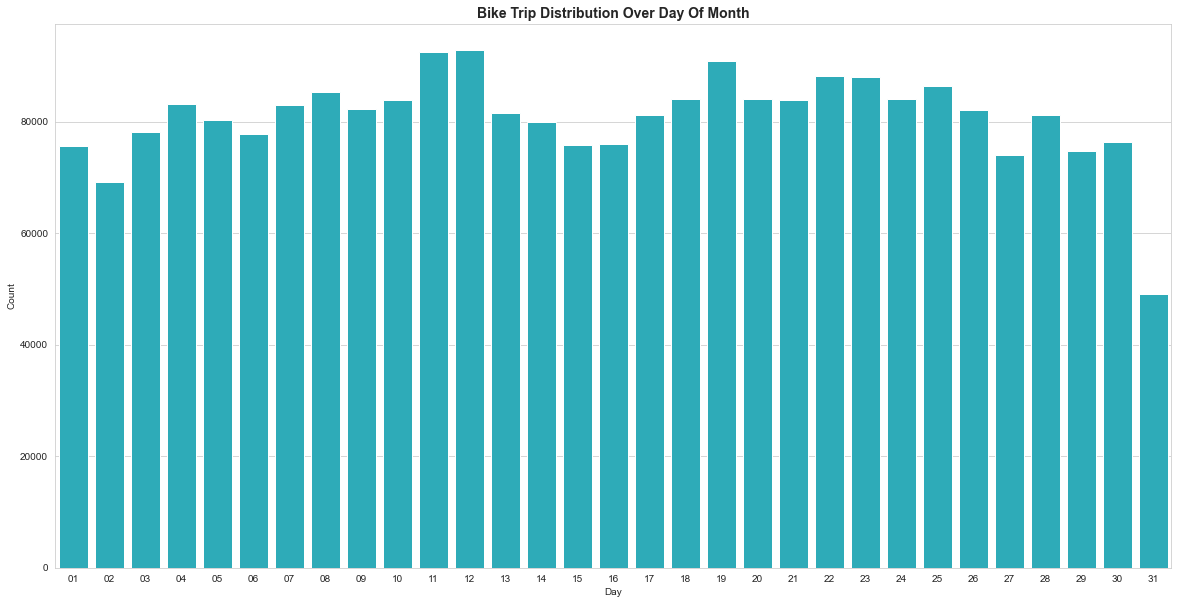

In [29]:
header = '2. Number of riders according to day of the month'
printTxt(header, color='Black')

sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_day', color=baseColor);
plt.xlabel('Day');
plt.ylabel('Count');
plt.title('Bike trip distribution over day of month'.title(),fontsize = 14, weight = 'bold');

<span style='color:Black'>3. Number of riders according to day of the week</span>

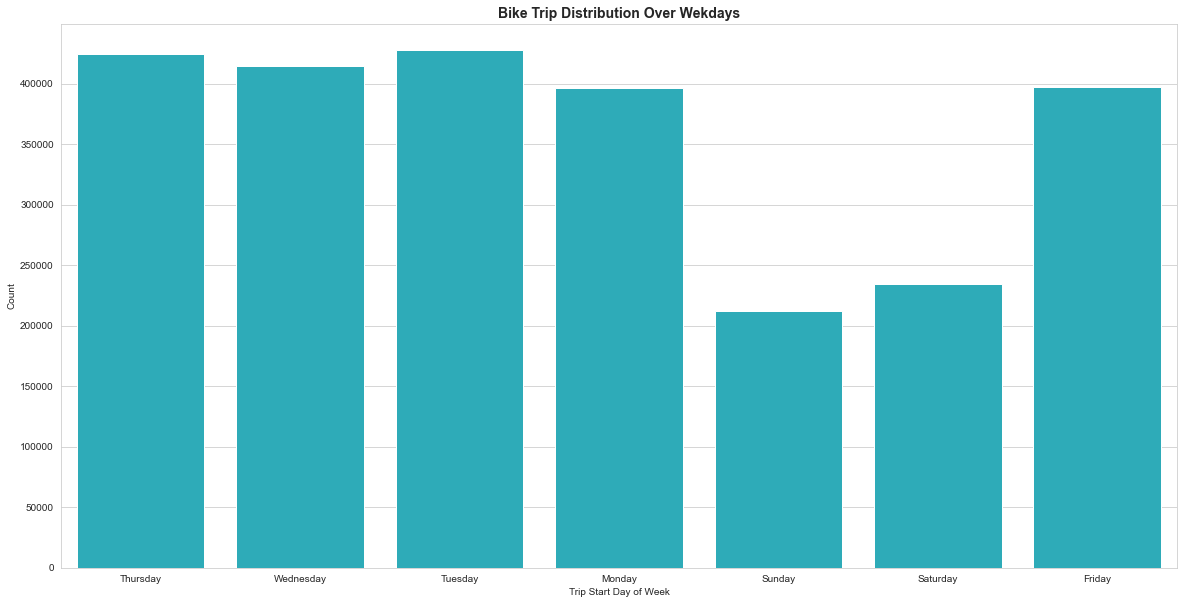

In [31]:
header = '3. Number of riders according to day of the week'
printTxt(header, color='Black')

fig, ax = plt.subplots(figsize = [20,10])
sb.countplot(data=df, x='start_dayofweek', color=baseColor);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Bike trip distribution over wekdays'.title(),fontsize = 14, weight = 'bold');

<span style='color:Black'>4. Number of riders according to hour of the day</span>

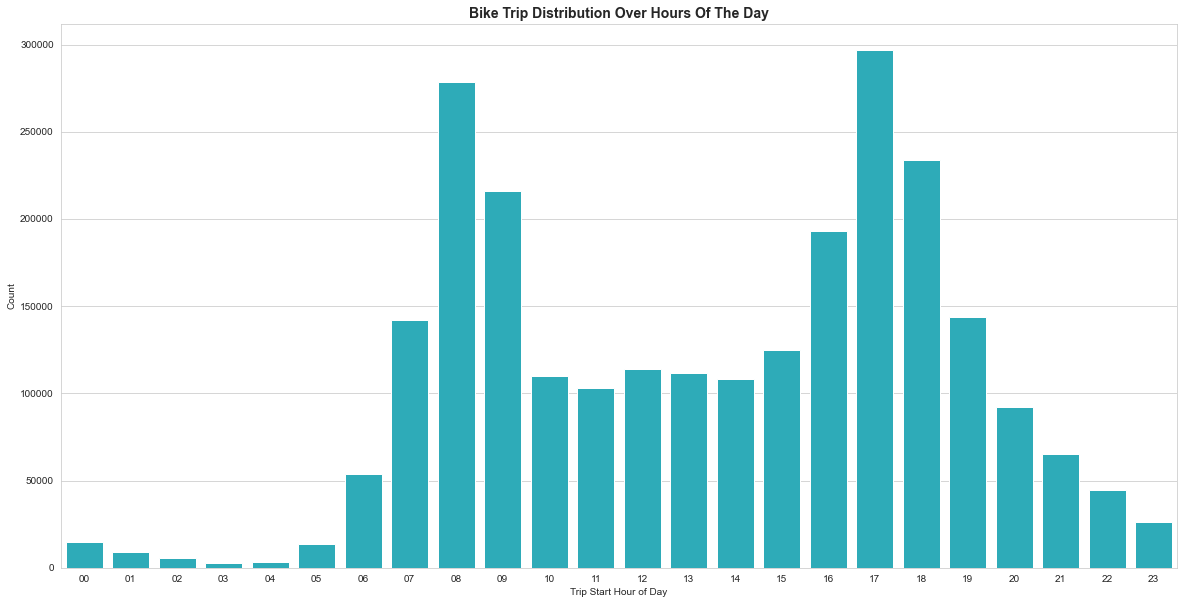

In [32]:
header = '4. Number of riders according to hour of the day'
printTxt(header, color='Black')

sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_hourofday', color=baseColor);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Bike trip distribution over hours of the day'.title(),fontsize = 14, weight = 'bold');

<span style='color:Black'>5. Riders count according to user type</span>

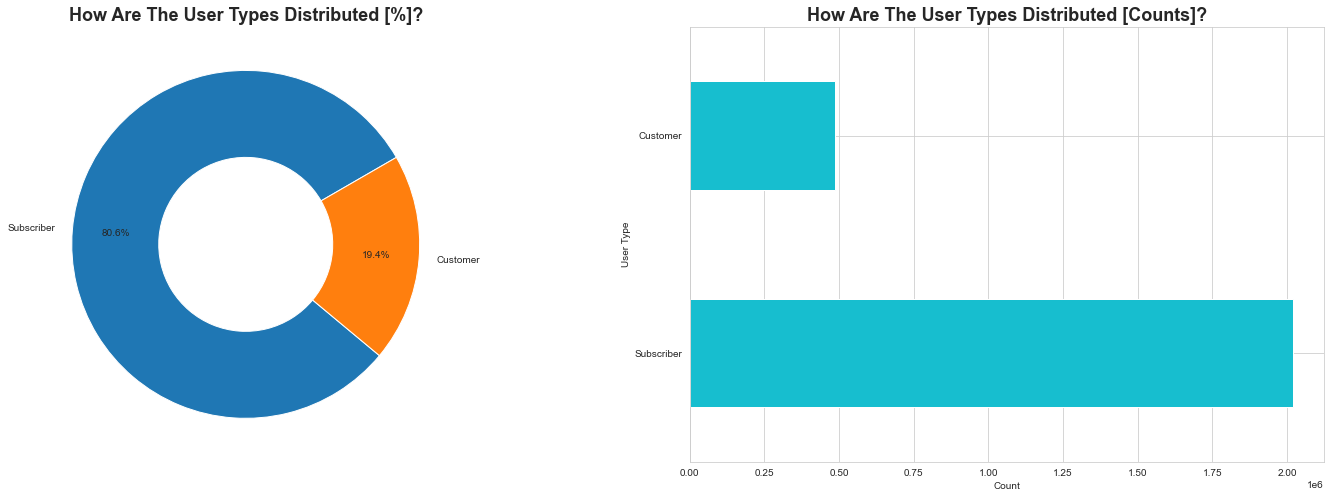

In [34]:
header = '5. Riders count according to user type'
printTxt(header, color='Black')

sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [25, 8])

plt.subplot(1, 2, 1);
plt.title('How are the User types distributed [%]?'.title(),
          fontsize = 18,
          weight = 'bold');
plt.pie(df['user_type'].value_counts(),
        autopct = '%1.1f%%',
        startangle = 30,
        labels = df['user_type'].value_counts().index,
        pctdistance = 0.75,
        wedgeprops = {'width' : 0.5});

plt.subplot(1, 2, 2);
plt.title('How are the User types distributed [Counts]?'.title(), fontsize=18, weight='bold');
df['user_type'].value_counts().plot(kind='barh', color = baseColor);
plt.xlabel('Count');
plt.ylabel('User Type');

<span style='color:Black'>6. Riders count according to access method</span>

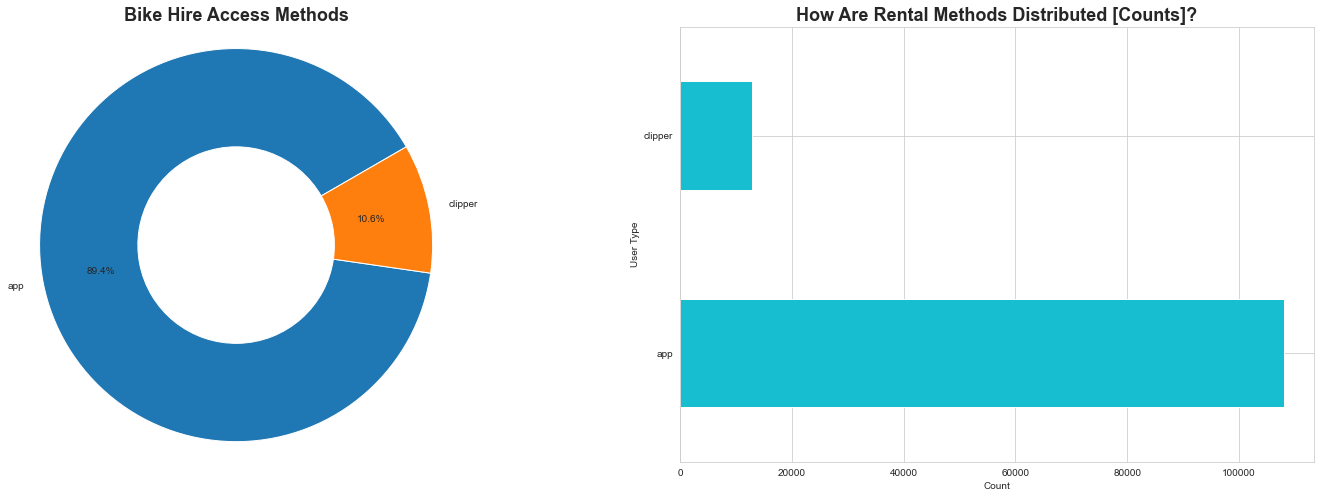

In [35]:
header = '6. Riders count according to access method'
printTxt(header, color='Black')

sb.set_style("whitegrid");
fig, ax = plt.subplots(figsize = [25, 8]);

plt.subplot(1, 2, 1);
plt.pie(df['rental_access_method'].value_counts(),
        labels = df['rental_access_method'].value_counts().index,
        autopct = '%1.1f%%',
        startangle = 30,
        pctdistance = 0.7,
        wedgeprops = {'width' : 0.5});
plt.title('Bike Hire Access methods'.title(), fontsize=18, weight='bold');
plt.axis('square');

plt.subplot(1, 2, 2);
plt.title('How are rental Methods distributed [Counts]?'.title(), fontsize=18, weight='bold');
df['rental_access_method'].value_counts().plot(kind='barh', color = baseColor);
plt.xlabel('Count');
plt.ylabel('User Type');

<span style='color:Black'>7. Which Riders type spend more time riding ?</span>

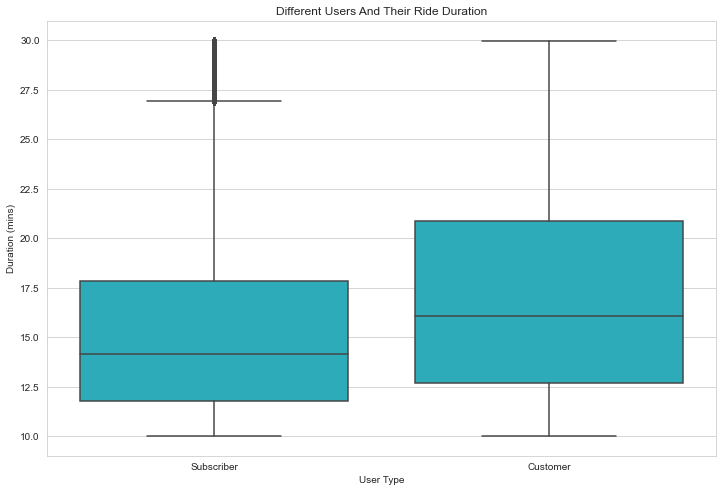

In [36]:
header = '7. Which Riders type spend more time riding ?'
printTxt(header, color='Black')

plt.figure(figsize = [12, 8])
sb.boxplot(data = df.query('duration_min > 10 and duration_min < 30'),
           x = 'user_type',
           y = 'duration_min',
           color = baseColor)
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

<span style='color:Black'>8. How rides are distributed in starting hours throughout days of week in both user types?</span>

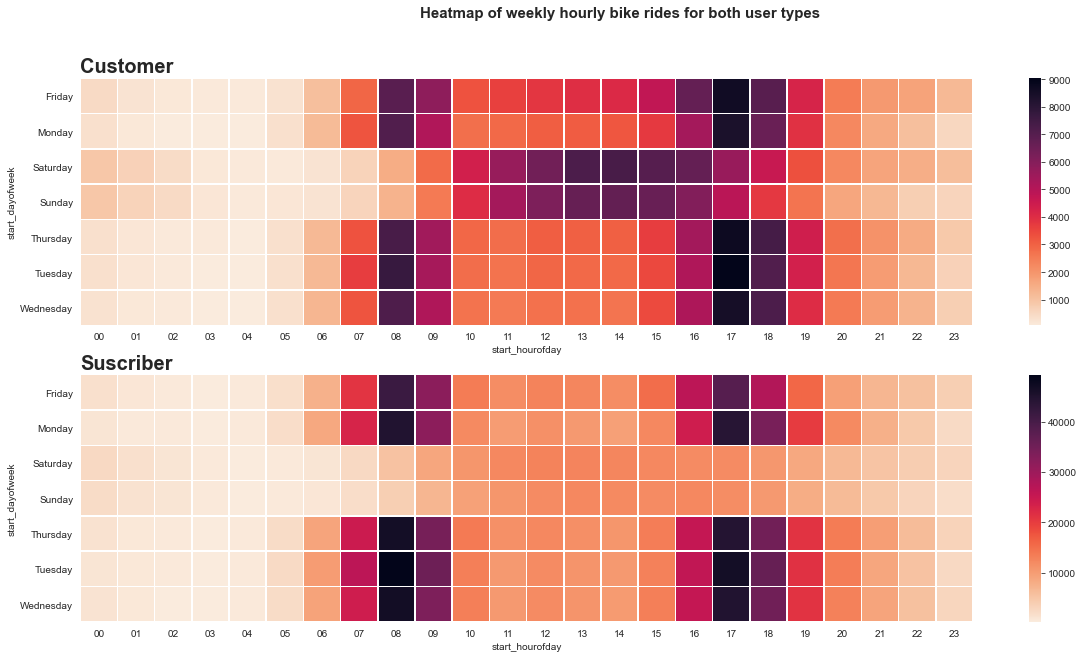

In [39]:
header = '8. How rides are distributed in starting hours throughout days of week in both user types?'
printTxt(header, color='Black')

# Grouping user types to obtain their counts
customer_data = df.query('user_type == "Customer"')
customer_count = customer_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')
customer_heatmap_pivotdata = customer_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')

suscribers_data = df.query('user_type == "Subscriber"')
suscribers_count = suscribers_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')
suscribers_heatmap_pivotdata = suscribers_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')

# Show output 
f, ax = plt.subplots(figsize=(20, 10))
plt.suptitle('Heatmap of weekly hourly bike rides for both user types', fontsize = 15, weight = 'bold')
plt.subplot(2, 1, 1)
sb.heatmap(customer_heatmap_pivotdata, cmap='rocket_r',linewidths=.5);
plt.title('Customer', loc='left', fontsize=20, weight='bold');

plt.subplot(2, 1, 2)
sb.heatmap(suscribers_heatmap_pivotdata, cmap='rocket_r',linewidths=.5);
plt.title('Suscriber', loc='left', fontsize=20, weight='bold');

<span style='color:Black'>8. How rides are distributed in throughout days of week in both user types?</span>

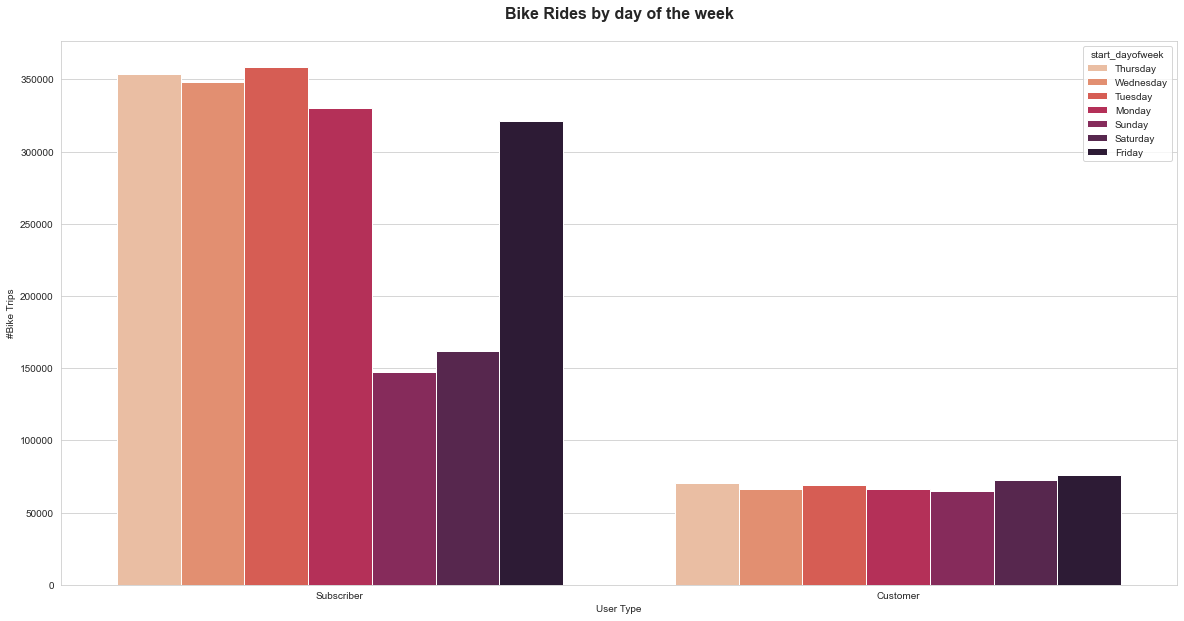

In [40]:
header = '8. How rides are distributed in throughout days of week in both user types?'
printTxt(header, color='Black')

plt.figure(figsize = [20, 10])
graph = sb.countplot(data = df,
                     x = 'user_type',
                     hue = 'start_dayofweek',
                     palette = 'rocket_r',
                     order = df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('Bike Rides by day of the week', y=1.03, fontsize=16, fontweight='semibold');

<span style='color:Black'>9. Which user types has longer duration throughout the week days?</span>

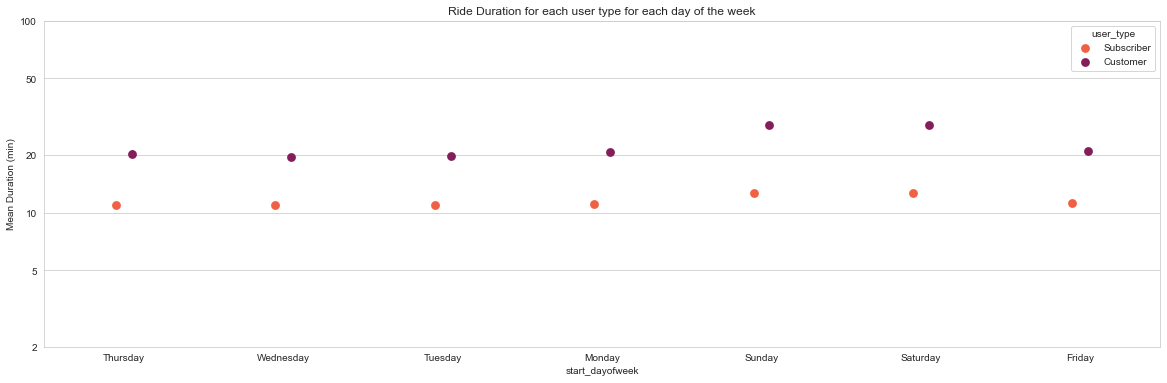

In [41]:
header = '9. Which user types has longer duration throughout the week days?'
printTxt(header, color='Black')

fig = plt.figure(figsize = [20, 6]);
ax = sb.pointplot(data = df,
                  x = 'start_dayofweek',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.1);
plt.title('Ride Duration for each user type for each day of the week');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([2, 5, 10, 20, 50, 100], [2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

# Some Observations:
- Customers spend more time.
- Customers number is almost fixed throughout days of the week.
- Customers tend to delay ride start time in weekends.

## Summary
In the preceding visualisations we see the different users and their different way of accessing the bike, ride durations, peference for the biek type.

In [42]:
# Convert notebook to html file
from subprocess import call
call(['python', '-m', 'nbconvert', 'slide_deck.ipynb']);
print ('Done Converting to html')

Done Converting to html


In [43]:
call(['python', '-m', 'nbconvert', 'slide_deck.ipynb --to slides --post serve --template output_toogle']);
print ('Done Converting to html')

#    jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

Done Converting to html
